In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
def import_data(file_path : str):
    with open(file_path, "r") as file:
        data = file.readlines()
    
    h = data[0]
    r = data[1:]
    
    return h.strip(), [[item for item in row.strip().split()] for row in r if row.strip() != ""]

In [34]:
# 1 - baseCount 3000 commandCount 10000
# 2 - baseCount 100 commandCount 1000
# 3 - baseCount 10000 commandCount 40000
# 4 - baseCount 1000 commandCount 400000
# 5 - baseCount 300 commandCount 400000
# 6 - baseCount 0 commandCount 100000
# 7 - baseCount 0 commandCount 1000000
headerSimple, rowsSimple = import_data("./data/6/simple_memory_resource.txt")
headerTwin, rowsTwin = import_data("./data/6/twins_memory_resource.txt")

In [35]:
headerSimple

'objectsCount time allocatedMemory usedMemory commandType'

In [36]:
dfSimple = pd.DataFrame(rowsSimple, columns=headerSimple.split())
dfTwin = pd.DataFrame(rowsTwin, columns=headerTwin.split())

In [37]:
dfSimple

,objectsCount,time,allocatedMemory,usedMemory,commandType
0,0,0,0,0,DEALLOCATE
1,0,0,0,0,DEALLOCATE
2,1,1.5248e-05,4096,72,ALLOCATE
3,0,1.513e-06,4096,0,DEALLOCATE
4,0,0,4096,0,DEALLOCATE
...,...,...,...,...,...
100660,4,1.1782e-05,61440,288,DEALLOCATE
100661,3,1.0409e-05,61440,216,DEALLOCATE
100662,2,1.087e-05,61440,144,DEALLOCATE
100663,1,1.081e-05,61440,72,DEALLOCATE


In [38]:
dfSimple = dfSimple[dfSimple["time"] != "0"]
dfTwin = dfTwin[dfTwin["time"] != "0"]

In [39]:
dfSimple

,objectsCount,time,allocatedMemory,usedMemory,commandType
2,1,1.5248e-05,4096,72,ALLOCATE
3,0,1.513e-06,4096,0,DEALLOCATE
5,1,1.0159e-05,4096,72,ALLOCATE
6,0,1.543e-06,4096,0,DEALLOCATE
7,1,3.086e-06,4096,72,ALLOCATE
...,...,...,...,...,...
100660,4,1.1782e-05,61440,288,DEALLOCATE
100661,3,1.0409e-05,61440,216,DEALLOCATE
100662,2,1.087e-05,61440,144,DEALLOCATE
100663,1,1.081e-05,61440,72,DEALLOCATE


In [40]:
dfTwin

,objectsCount,time,allocatedMemory,usedMemory,commandType
2,1,7.8546e-05,4096,72,ALLOCATE
3,0,2.692e-05,4096,0,DEALLOCATE
5,1,4.321e-05,4096,72,ALLOCATE
6,0,1.646e-05,4096,0,DEALLOCATE
7,1,4.1367e-05,4096,72,ALLOCATE
...,...,...,...,...,...
100660,4,1.4287e-05,94208,288,DEALLOCATE
100661,3,1.2524e-05,94208,216,DEALLOCATE
100662,2,3.666e-06,94208,144,DEALLOCATE
100663,1,1.4217e-05,94208,72,DEALLOCATE


In [41]:
def set_column_types(df: pd.DataFrame) -> pd.DataFrame:
    df['objectsCount'] = df['objectsCount'].astype("int")
    df['time'] = df['time'].astype("float64")
    df['allocatedMemory'] = df['allocatedMemory'].astype("int")
    df['usedMemory'] = df['usedMemory'].astype("int")
    return df

In [42]:
dfSimple = set_column_types(dfSimple)
dfTwin = set_column_types(dfTwin)

C:\Users\nikit\AppData\Local\Temp\ipykernel_27412\2772558129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['objectsCount'] = df['objectsCount'].astype("int")
C:\Users\nikit\AppData\Local\Temp\ipykernel_27412\2772558129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = df['time'].astype("float64")
C:\Users\nikit\AppData\Local\Temp\ipykernel_27412\2772558129.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [43]:
dfSimple

,objectsCount,time,allocatedMemory,usedMemory,commandType
2,1,0.000015,4096,72,ALLOCATE
3,0,0.000002,4096,0,DEALLOCATE
5,1,0.000010,4096,72,ALLOCATE
6,0,0.000002,4096,0,DEALLOCATE
7,1,0.000003,4096,72,ALLOCATE
...,...,...,...,...,...
100660,4,0.000012,61440,288,DEALLOCATE
100661,3,0.000010,61440,216,DEALLOCATE
100662,2,0.000011,61440,144,DEALLOCATE
100663,1,0.000011,61440,72,DEALLOCATE


In [44]:
dfTwin

,objectsCount,time,allocatedMemory,usedMemory,commandType
2,1,0.000079,4096,72,ALLOCATE
3,0,0.000027,4096,0,DEALLOCATE
5,1,0.000043,4096,72,ALLOCATE
6,0,0.000016,4096,0,DEALLOCATE
7,1,0.000041,4096,72,ALLOCATE
...,...,...,...,...,...
100660,4,0.000014,94208,288,DEALLOCATE
100661,3,0.000013,94208,216,DEALLOCATE
100662,2,0.000004,94208,144,DEALLOCATE
100663,1,0.000014,94208,72,DEALLOCATE


In [45]:
dfSimple["type"] = "simple"
dfTwin["type"] = "twin"

C:\Users\nikit\AppData\Local\Temp\ipykernel_27412\2134288868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSimple["type"] = "simple"


In [46]:
dfSimple["idx"] = dfSimple.index
dfTwin["idx"] = dfTwin.index

C:\Users\nikit\AppData\Local\Temp\ipykernel_27412\3196740095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSimple["idx"] = dfSimple.index


In [47]:
dfSimple

,objectsCount,time,allocatedMemory,usedMemory,commandType,type,idx
2,1,0.000015,4096,72,ALLOCATE,simple,2
3,0,0.000002,4096,0,DEALLOCATE,simple,3
5,1,0.000010,4096,72,ALLOCATE,simple,5
6,0,0.000002,4096,0,DEALLOCATE,simple,6
7,1,0.000003,4096,72,ALLOCATE,simple,7
...,...,...,...,...,...,...,...
100660,4,0.000012,61440,288,DEALLOCATE,simple,100660
100661,3,0.000010,61440,216,DEALLOCATE,simple,100661
100662,2,0.000011,61440,144,DEALLOCATE,simple,100662
100663,1,0.000011,61440,72,DEALLOCATE,simple,100663


In [48]:
dfTwin

,objectsCount,time,allocatedMemory,usedMemory,commandType,type,idx
2,1,0.000079,4096,72,ALLOCATE,twin,2
3,0,0.000027,4096,0,DEALLOCATE,twin,3
5,1,0.000043,4096,72,ALLOCATE,twin,5
6,0,0.000016,4096,0,DEALLOCATE,twin,6
7,1,0.000041,4096,72,ALLOCATE,twin,7
...,...,...,...,...,...,...,...
100660,4,0.000014,94208,288,DEALLOCATE,twin,100660
100661,3,0.000013,94208,216,DEALLOCATE,twin,100661
100662,2,0.000004,94208,144,DEALLOCATE,twin,100662
100663,1,0.000014,94208,72,DEALLOCATE,twin,100663


In [49]:
df = pd.concat([dfSimple, dfTwin], ignore_index=True)

In [50]:
df

,objectsCount,time,allocatedMemory,usedMemory,commandType,type,idx
0,1,0.000015,4096,72,ALLOCATE,simple,2
1,0,0.000002,4096,0,DEALLOCATE,simple,3
2,1,0.000010,4096,72,ALLOCATE,simple,5
3,0,0.000002,4096,0,DEALLOCATE,simple,6
4,1,0.000003,4096,72,ALLOCATE,simple,7
...,...,...,...,...,...,...,...
201239,4,0.000014,94208,288,DEALLOCATE,twin,100660
201240,3,0.000013,94208,216,DEALLOCATE,twin,100661
201241,2,0.000004,94208,144,DEALLOCATE,twin,100662
201242,1,0.000014,94208,72,DEALLOCATE,twin,100663


Text(0.5, 1.0, 'Command execution time over time')

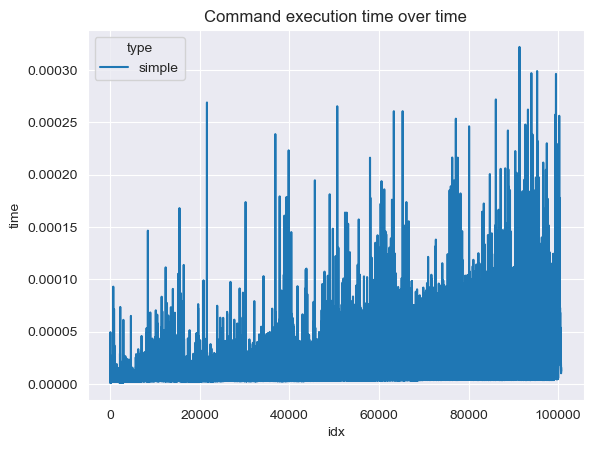

In [51]:
sns.lineplot(data=df[df['type'] == "simple"], x="idx", y="time", hue="type").set_title("Command execution time over time")

Text(0.5, 1.0, 'Command execution time over time')

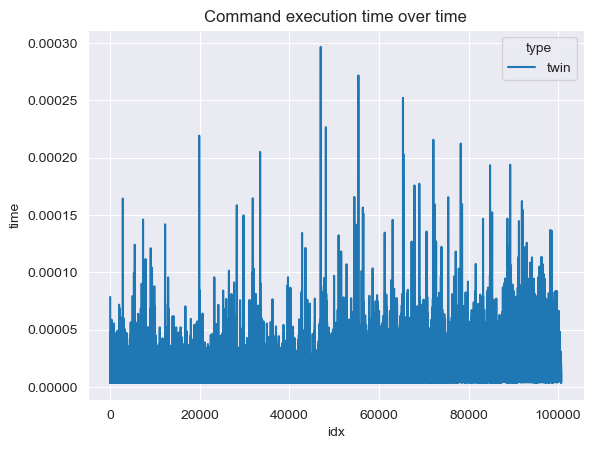

In [52]:
sns.lineplot(data=df[df['type'] == "twin"], x="idx", y="time", hue="type").set_title("Command execution time over time")

Text(0.5, 1.0, 'Command execution time over time')

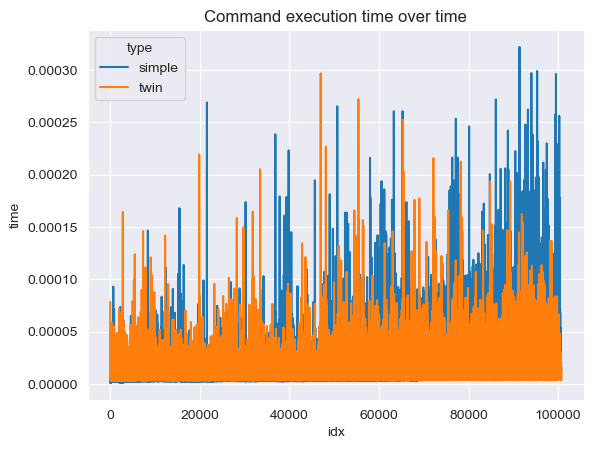

In [53]:
sns.lineplot(data=df, x="idx", y="time", hue="type").set_title("Command execution time over time")

In [54]:
df["usageFactor"] = df["usedMemory"] / df["allocatedMemory"]

Text(0.5, 1.0, 'Usage factor over time')

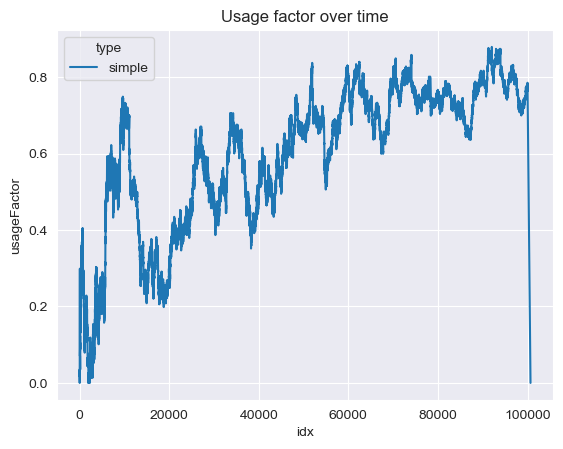

In [55]:
sns.lineplot(data=df[df['type'] == "simple"], x="idx", y="usageFactor", hue="type").set_title("Usage factor over time")

Text(0.5, 1.0, 'Usage factor over time')

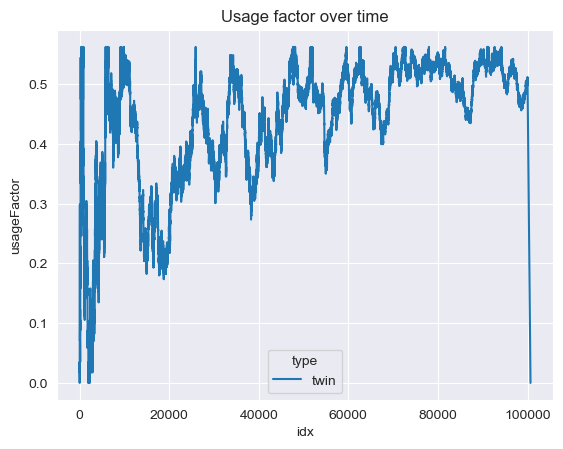

In [56]:
sns.lineplot(data=df[df['type'] == "twin"], x="idx", y="usageFactor", hue="type").set_title("Usage factor over time")

Text(0.5, 1.0, 'Usage factor over time')

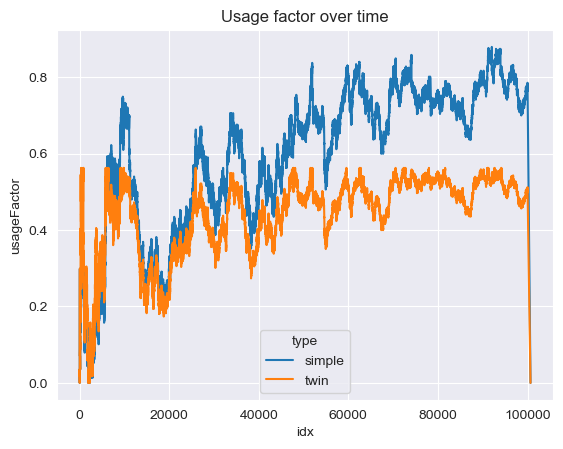

In [57]:
sns.lineplot(data=df, x="idx", y="usageFactor", hue="type").set_title("Usage factor over time")

Text(0.5, 1.0, 'Allocation execution time over time')

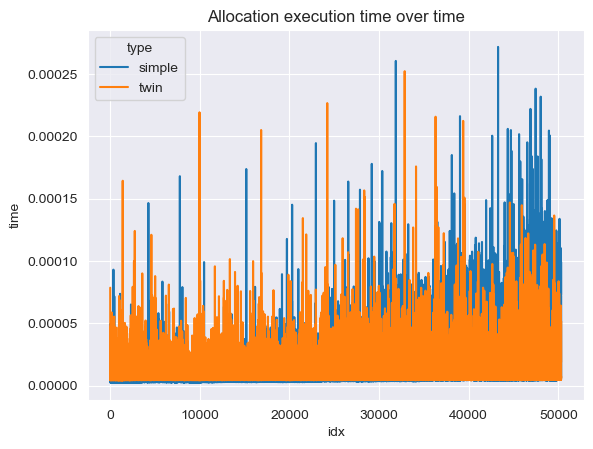

In [58]:
dfSimpleAllocate = dfSimple.drop(columns=["idx"])[dfSimple["commandType"] == "ALLOCATE"]
dfTwinAllocate = dfTwin.drop(columns=["idx"])[dfTwin["commandType"] == "ALLOCATE"]

dfSimpleAllocate = dfSimpleAllocate.reset_index()
dfTwinAllocate = dfTwinAllocate.reset_index()

dfSimpleAllocate["idx"] = dfSimpleAllocate.index
dfTwinAllocate["idx"] = dfTwinAllocate.index

dfAllocate = pd.concat([dfSimpleAllocate, dfTwinAllocate], ignore_index=True)

sns.lineplot(data=dfAllocate, x="idx", y="time", hue="type").set_title("Allocation execution time over time")

In [59]:
dfSimpleAllocate["time"].max(), dfTwinAllocate["time"].max() 

(0.000271724, 0.000252259)

In [60]:
dfSimpleAllocate["time"].mean(), dfTwinAllocate["time"].mean() 

(1.3993522668998827e-05, 1.0560831647154699e-05)

In [61]:
dfSimpleAllocate["time"].min(), dfTwinAllocate["time"].min() 

(2.164e-06, 4.328e-06)

Text(0.5, 1.0, 'Deallocation execution time over time')

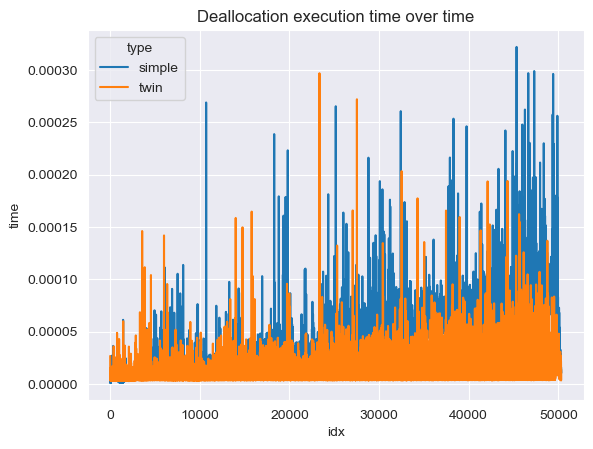

In [62]:
dfSimpleDeallocate = dfSimple.drop(columns=["idx"])[dfSimple["commandType"] == "DEALLOCATE"]
dfTwinDeallocate = dfTwin.drop(columns=["idx"])[dfTwin["commandType"] == "DEALLOCATE"]

dfSimpleDeallocate = dfSimpleDeallocate.reset_index()
dfTwinDeallocate = dfTwinDeallocate.reset_index()

dfSimpleDeallocate["idx"] = dfSimpleDeallocate.index
dfTwinDeallocate["idx"] = dfTwinDeallocate.index

dfDeallocate = pd.concat([dfSimpleDeallocate, dfTwinDeallocate], ignore_index=True)

sns.lineplot(data=dfDeallocate, x="idx", y="time", hue="type").set_title("Deallocation execution time over time")

In [63]:
df

,objectsCount,time,allocatedMemory,usedMemory,commandType,type,idx,usageFactor
0,1,0.000015,4096,72,ALLOCATE,simple,2,0.017578
1,0,0.000002,4096,0,DEALLOCATE,simple,3,0.000000
2,1,0.000010,4096,72,ALLOCATE,simple,5,0.017578
3,0,0.000002,4096,0,DEALLOCATE,simple,6,0.000000
4,1,0.000003,4096,72,ALLOCATE,simple,7,0.017578
...,...,...,...,...,...,...,...,...
201239,4,0.000014,94208,288,DEALLOCATE,twin,100660,0.003057
201240,3,0.000013,94208,216,DEALLOCATE,twin,100661,0.002293
201241,2,0.000004,94208,144,DEALLOCATE,twin,100662,0.001529
201242,1,0.000014,94208,72,DEALLOCATE,twin,100663,0.000764


Text(0.5, 1.0, 'Object amount over time')

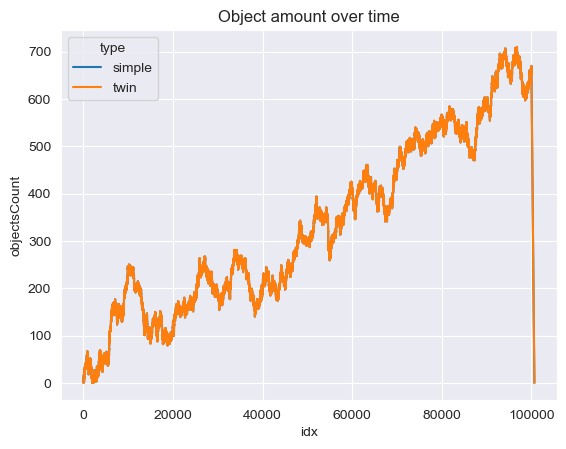

In [64]:
sns.lineplot(data=df, x="idx", y="objectsCount", hue="type").set_title("Object amount over time")